# Credit Card Fraud Detection System

This notebook contains my approach towards credit card fraud detection using Machine Learning Algorithms. Credit card fraud detection is a very serious modern day problem. In this notebook my aim will be to get the maximum possible accuracy for the European Tracsaction data set which was released in 2013. The metrics I will be using is F1- Score, Precision and Recall.

We will first import the necessary libraries for EDA:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
import time
warnings.filterwarnings("ignore")

from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

from sklearn import metrics
from sklearn.metrics import auc, f1_score, plot_roc_curve, precision_score, recall_score

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

Now let us import the data we have:

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Now let us check if there are any null values present in our data set:**

If null values are found we will replace these values with the mean or median of that data attribute.

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As we can see there are no null values in our data set so we can move forward and understand our dataset.

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### EDA (Exploratory Data Analysis):
In this step we will plot different graphs and try to find out different patterns in our data which will help us for feature selection.

#### Distribution of Target Variable:
The graph below shows the distribution of our target varible which has two values 0 and 1 indicating not a fraud and a fraud respectively.

[]

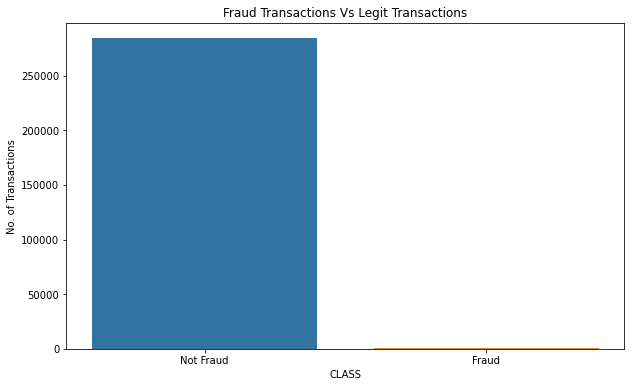

In [5]:
data = list(df["Class"].values)
ones = data.count(1)
zeros = data.count(0)
fig = plt.figure(figsize=(10,6))
sns.barplot(x=["Not Fraud", "Fraud"], y = [zeros, ones])
plt.title("Fraud Transactions Vs Legit Transactions")
plt.xlabel("CLASS")
plt.ylabel("No. of Transactions")
plt.plot()

It is clearly visible that there is a great imbalance in the data where we have extremely low fraud transactions and too many legit ones so to tackle this issue we will have to use techniques like undersapling the data while traning our model.

### Fixing Data Set Imbalance:
Now the next step will be data preparation for model fitting and testing. In our data as discussed above there is a lot of imbalance in the the Legit and the Fraud Transactions so we will do some oversampling or undersampling of data. As our Data set is not very huge we will use oversampling which will prevent the loss of any kind of valuable data. We will keep the fraud transactions and the legit ones in ratio of about 1:1 which will make it perfectly balanced. 

To do so we will take help of the imblearn library in python.

In [6]:
over_sampler = SMOTE(sampling_strategy="minority")
X = df.iloc[:, :30]
Y = df.iloc[:, 30]

X_oversampled, Y_oversampled = over_sampler.fit_resample(X, Y)
counter = 0
o_df = pd.DataFrame()
for i in list(df.columns)[:30]:
    o_df[i] = X_oversampled[i]
    counter += 1
    
o_df["Class"] = Y_oversampled
df = o_df.copy()
Counter(Y_oversampled)

Counter({0: 284315, 1: 284315})

**Now let us check for the data distribution for the other attributes as well:**

We want the distribution tu be Gaussian if not then we will apply data transformation tecniques to convert it into a Gaussian curve.

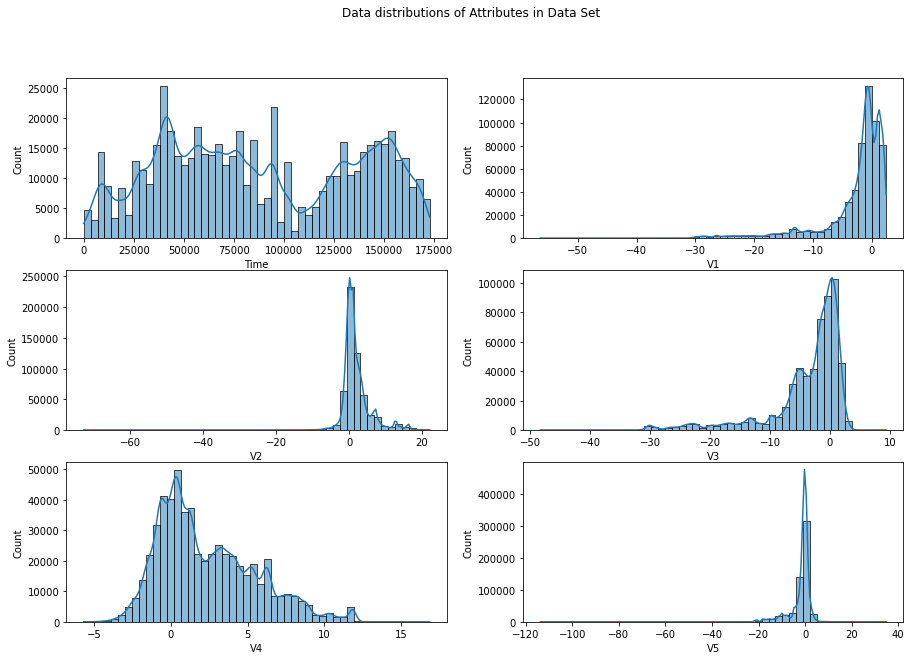

In [7]:
columns = list(df.columns)

def data_distribution(columns, bins = 50):
    fig = plt.figure(figsize=(15, 10))
    plt.suptitle("Data distributions of Attributes in Data Set")
    counter = 1
    for i in columns:
        plt.subplot(3,2, counter)
        sns.histplot(df[i], bins = bins, kde = True)
        counter += 1
        
data_distribution(columns[:6])

**In the graphs above it is visible that the distribution of Time, V1, V3, V4 is not gaussian so we will have to do transformation of these columns**
1. Time = Not Smooth Gaussian
2. V1 = Not Smooth Gaussian
3. V3 = Left Skewed
4. V4 = Right Skewed

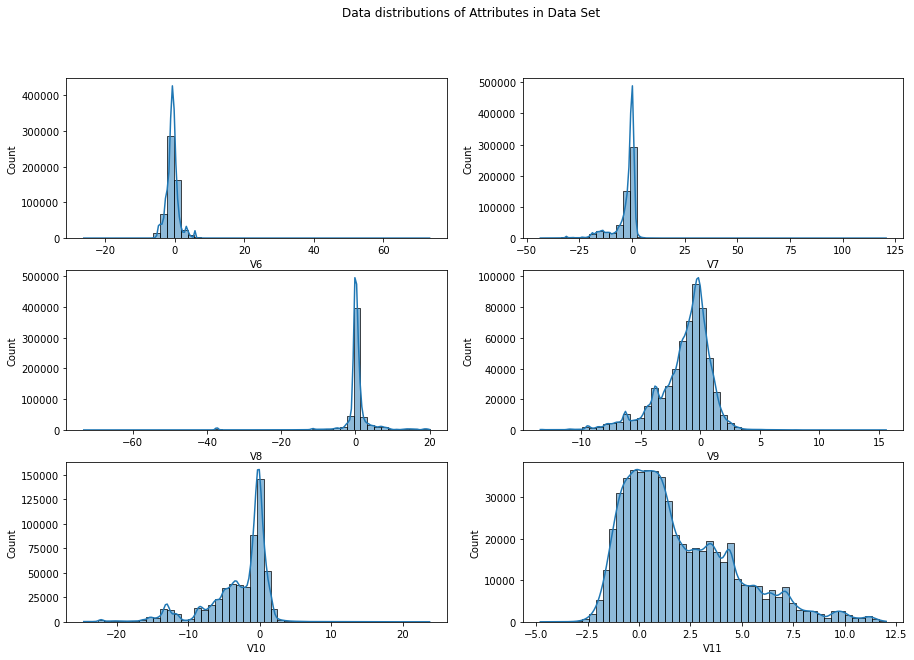

In [8]:
data_distribution(columns[6:12])

**Some of the graphs above show normal Gaussian Distribution which means no transformation is required for those but V7, V10, V11 need transformation**
1. V7 = Left Skewed
2. V10 = Left Skewed
3. V11 = Right Skewed

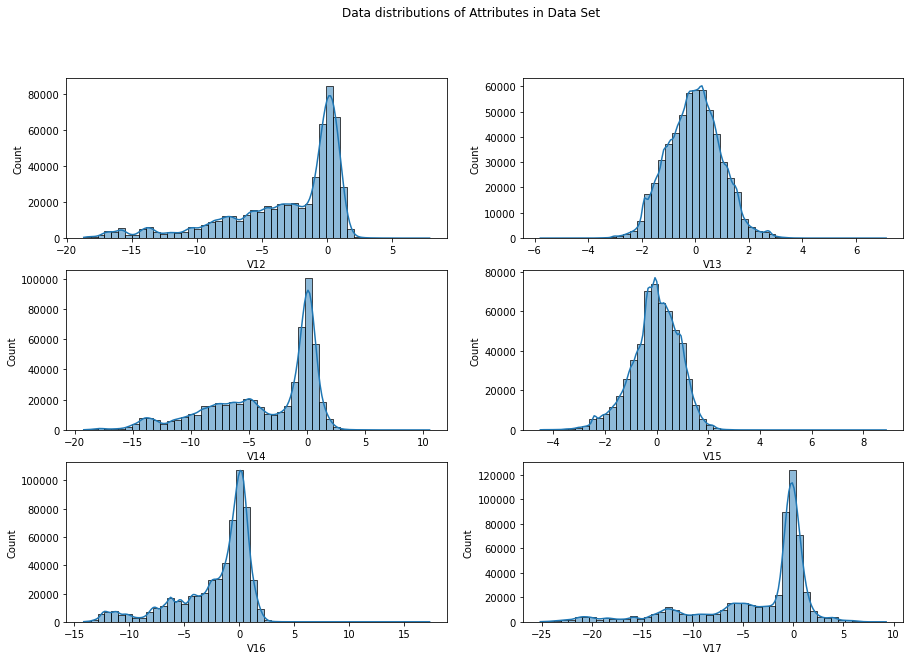

In [9]:
data_distribution(columns[12:18])

**Most of the graphs above do not show normal Gaussian Distribution which means transformation is required**
1. V12 = Left Skewed
2. V14 = Left Skewed
3. V16 = Left Skewed
4. V17 = Left Skewed

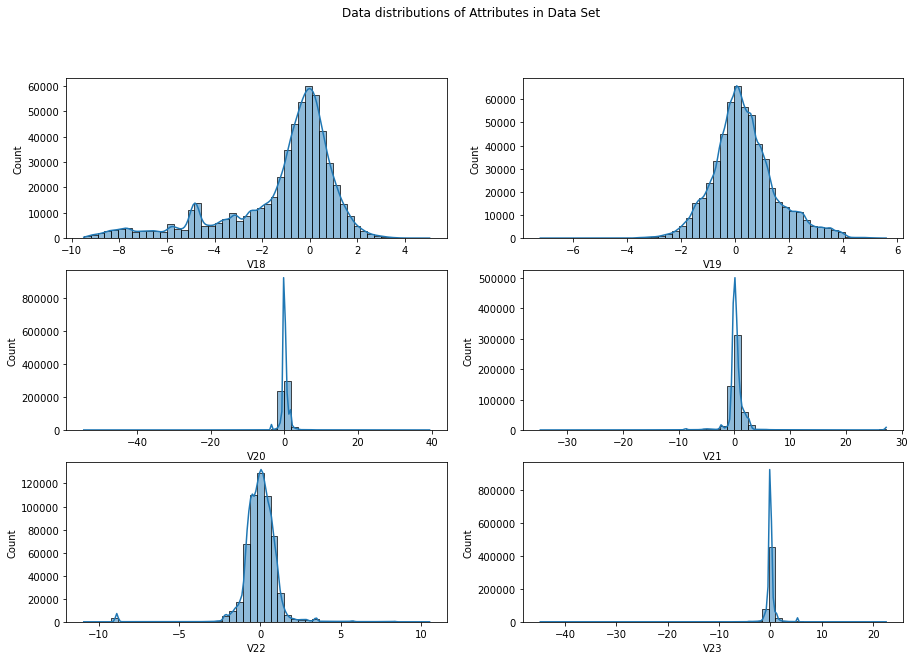

In [10]:
data_distribution(columns[18:24])

**Most of the graphs above show normal Gaussian Distribution except V18 which means no transformation is required for most of the columns**
1. V18 = Left Skewed

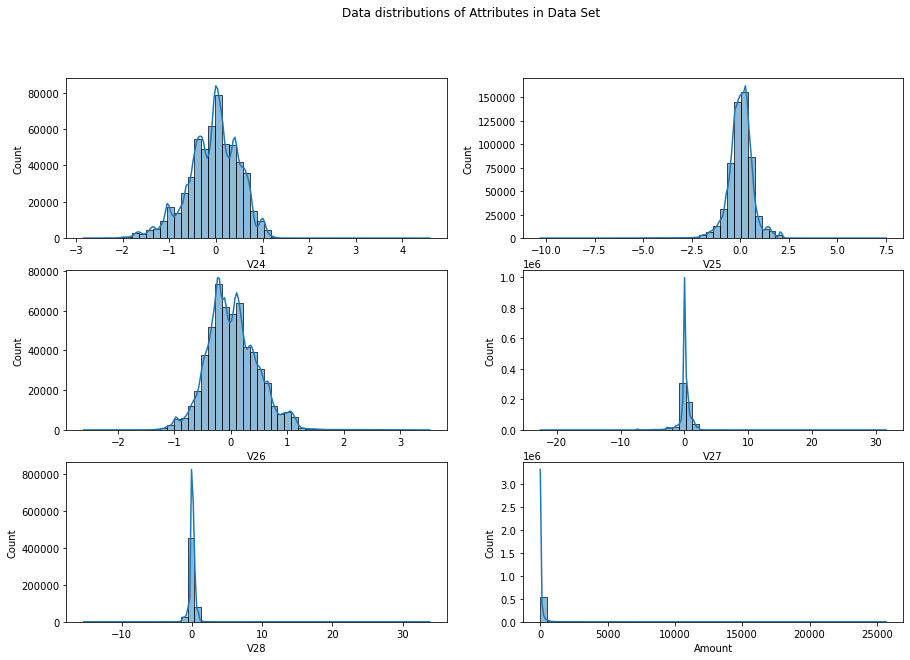

In [11]:
data_distribution(columns[24:30])

**In the graph above it is seen that the Amount variable has left skewness in the Amount data and it is seen that V24 has a Gaussian Distribution but doesn't show a smooth curve so we will have to transform the data.**
1. V24 = Not Smooth Gaussian

### Transforming the Data:

For transforming the data we will use the Power Transformer from sklearn. The variables to be transformed are:
1. Time
2. V1
3. V3
4. V4
5. V7
6. V10
7. V11
8. V12
9. V14
10. V16
11. V17
12. V18
13. V24

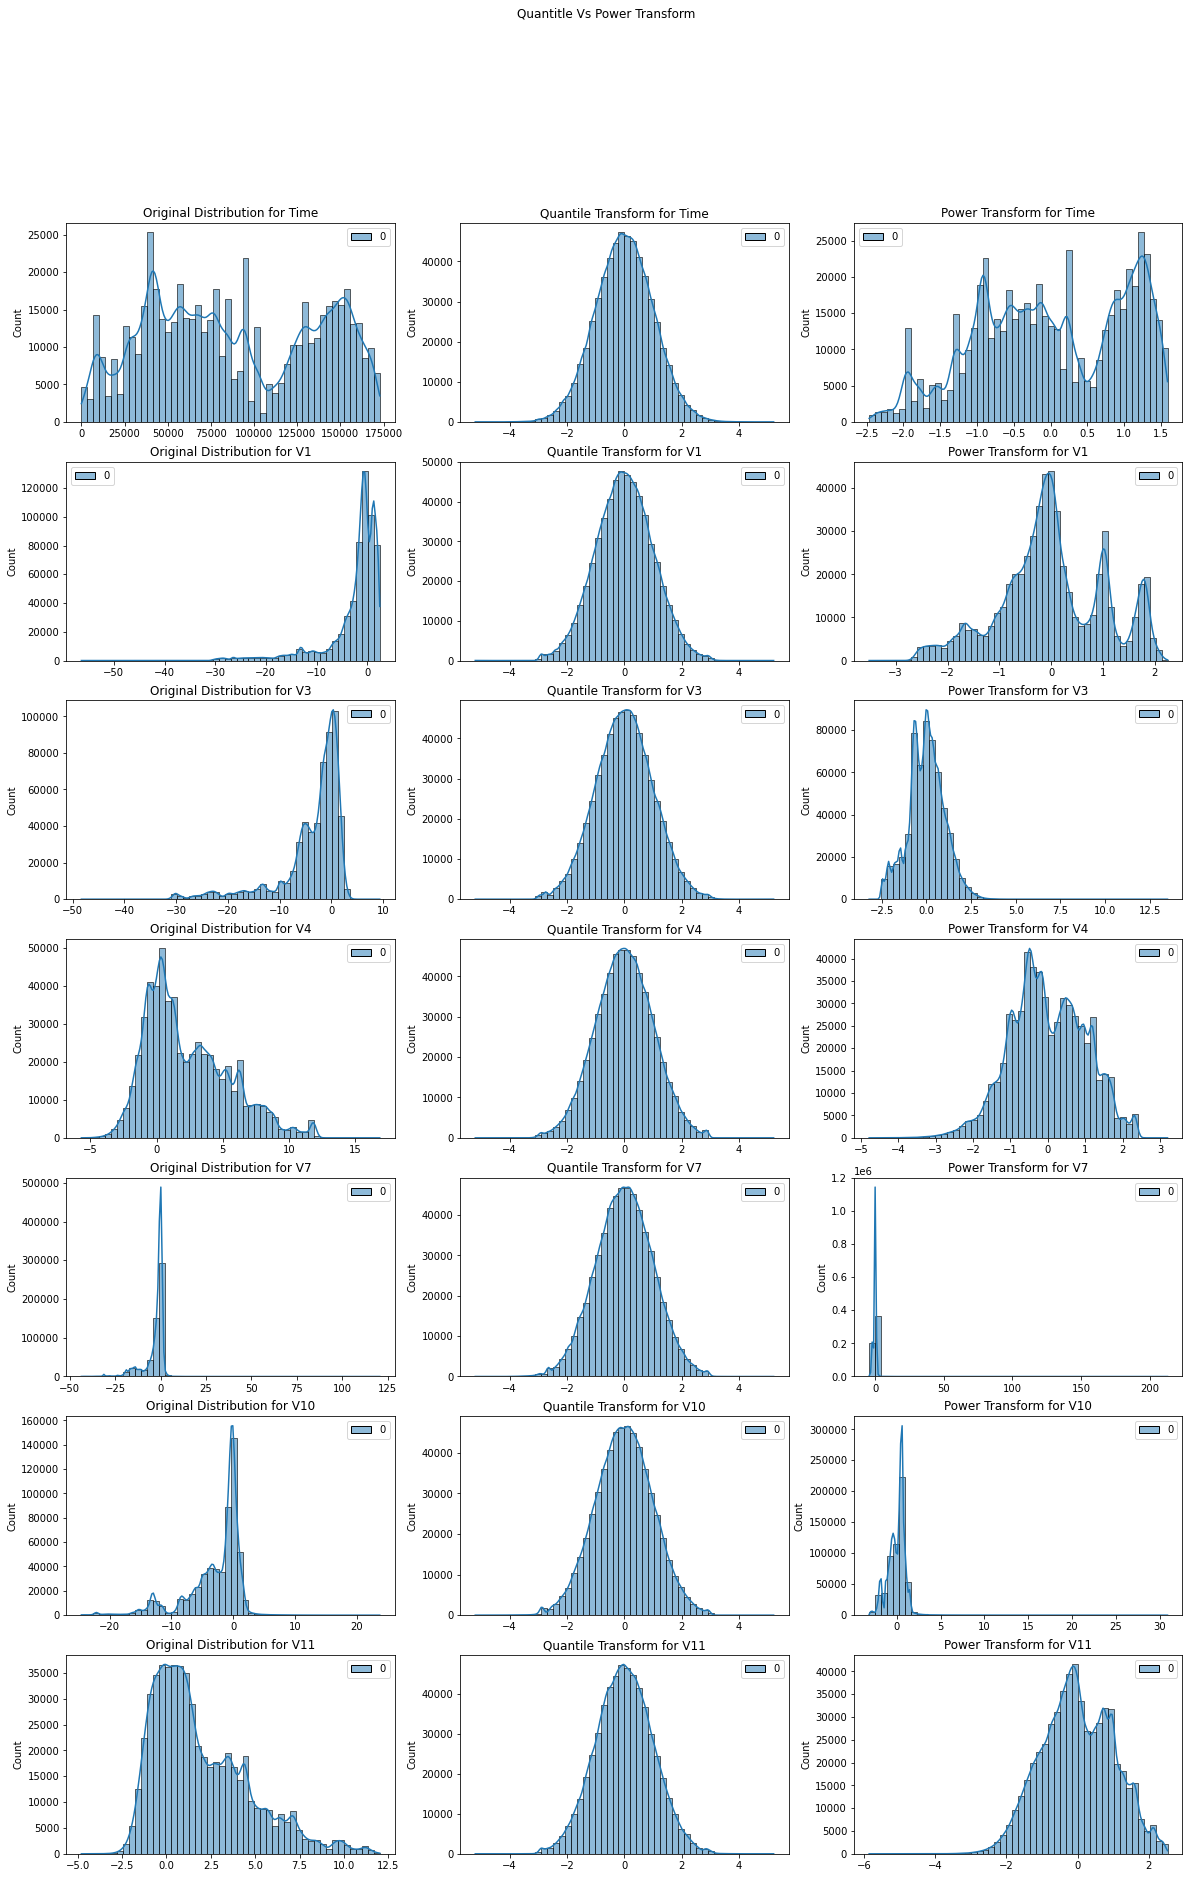

In [12]:
cols1 = ["Time", "V1", "V3", "V4", "V7", "V10", "V11"]
cols2 = ["V12", "V14", "V16", "V17", "V18", "V19", "V24"]

def check_best_transformer(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    plt.suptitle("Quantitle Vs Power Transform")
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(7,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(7,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(7,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3

check_best_transformer(cols1)

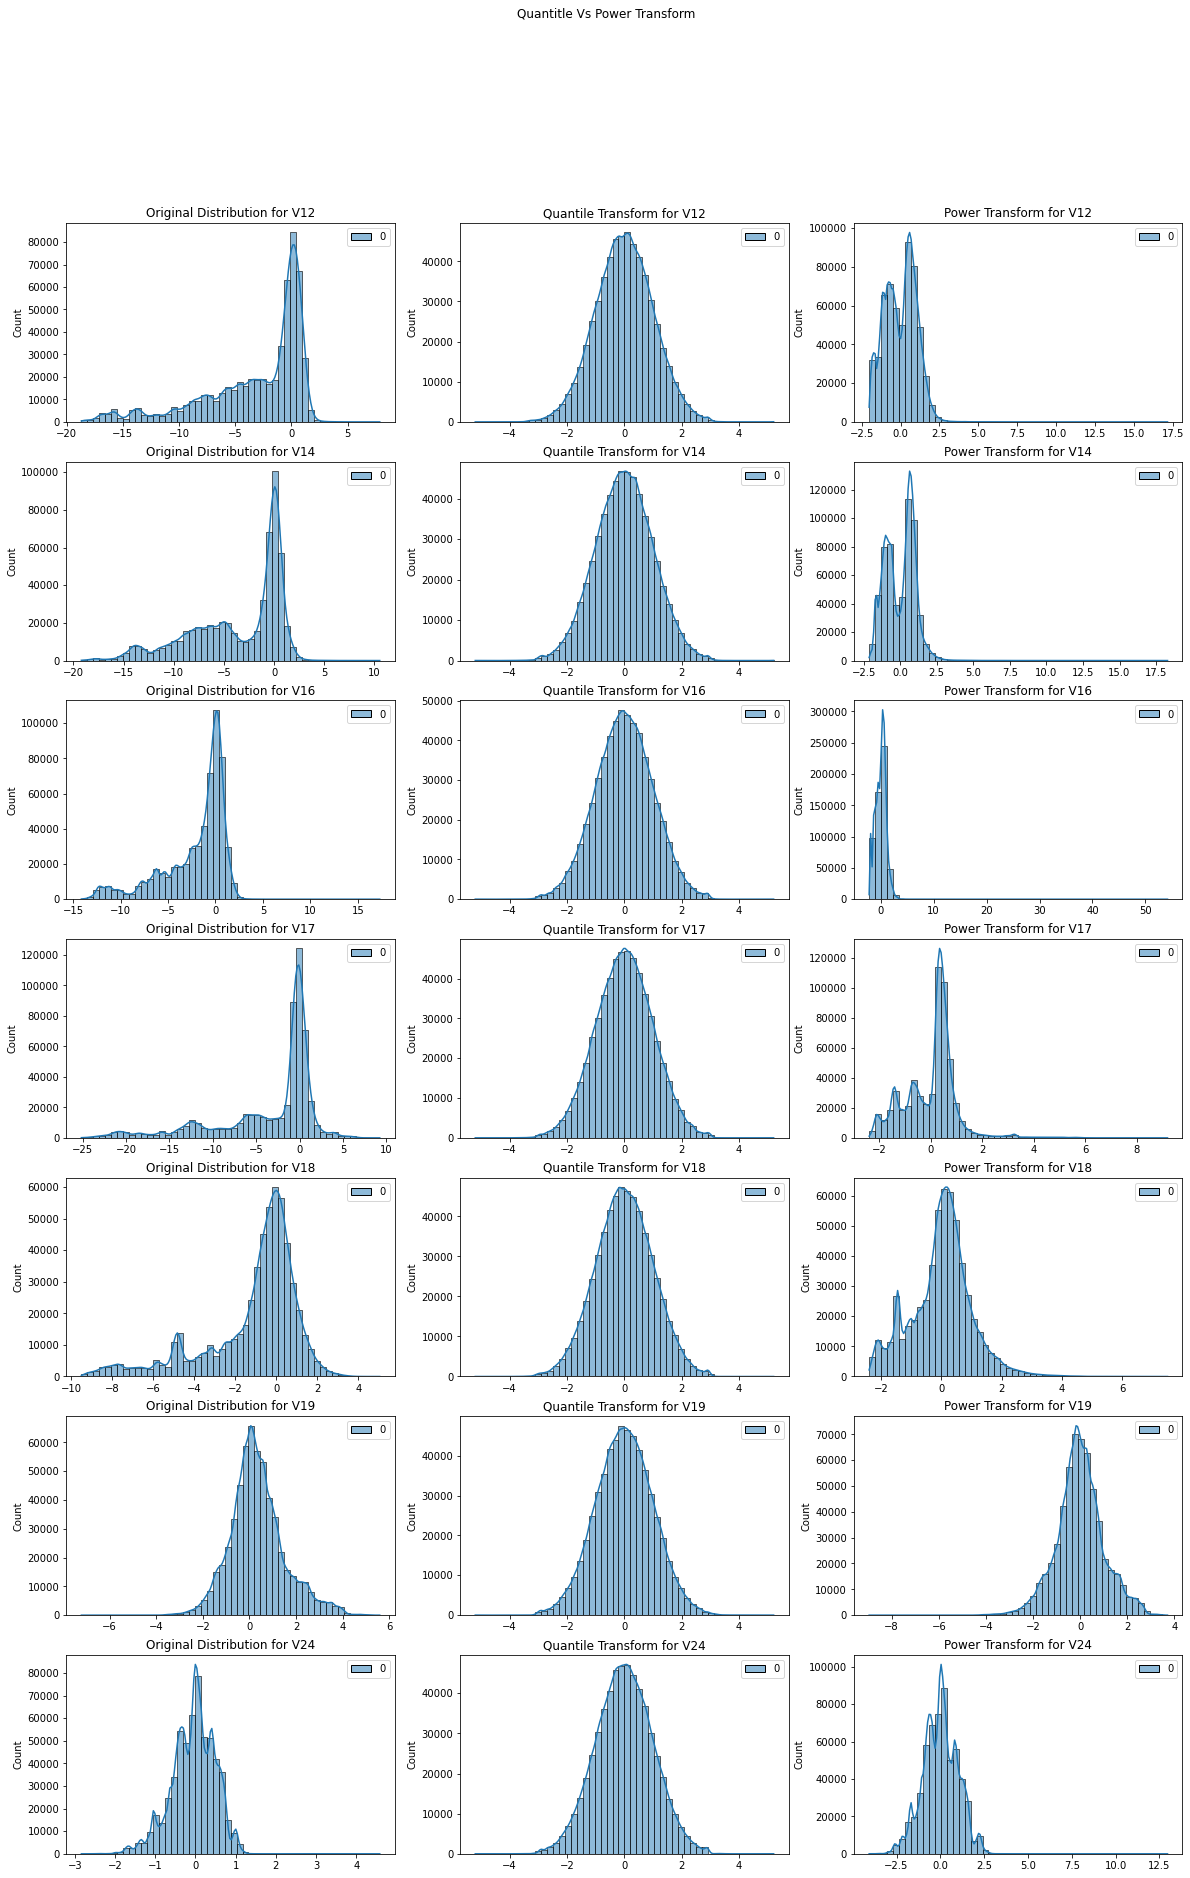

In [13]:
check_best_transformer(cols2)

**It is clearly seen from the graphs above that Quantile Transformer works a better job at transforming the data into Gaussian Distribution. So we will apply the Quantile Tranformer on our data.**

In [14]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
cols = cols1 + cols2
for i in cols:
    df[i] = qt.fit_transform(np.array(df[i]).reshape(-1,1))
    print(f"{i} transformation Successful!")


Time transformation Successful!
V1 transformation Successful!
V3 transformation Successful!
V4 transformation Successful!
V7 transformation Successful!
V10 transformation Successful!
V11 transformation Successful!
V12 transformation Successful!
V14 transformation Successful!
V16 transformation Successful!
V17 transformation Successful!
V18 transformation Successful!
V19 transformation Successful!
V24 transformation Successful!


### Correlation Graph:

Now we will check the correlation between independent variables and the target variables. To do this we will use the Pearson Correlation. the Pearson Correalation Coefficient ranges from (-1 to 1) where -1 means that the data is negatively correlated, 1 means that the data is positively correlated and 0 means that there is no correlation between the variables.

[]

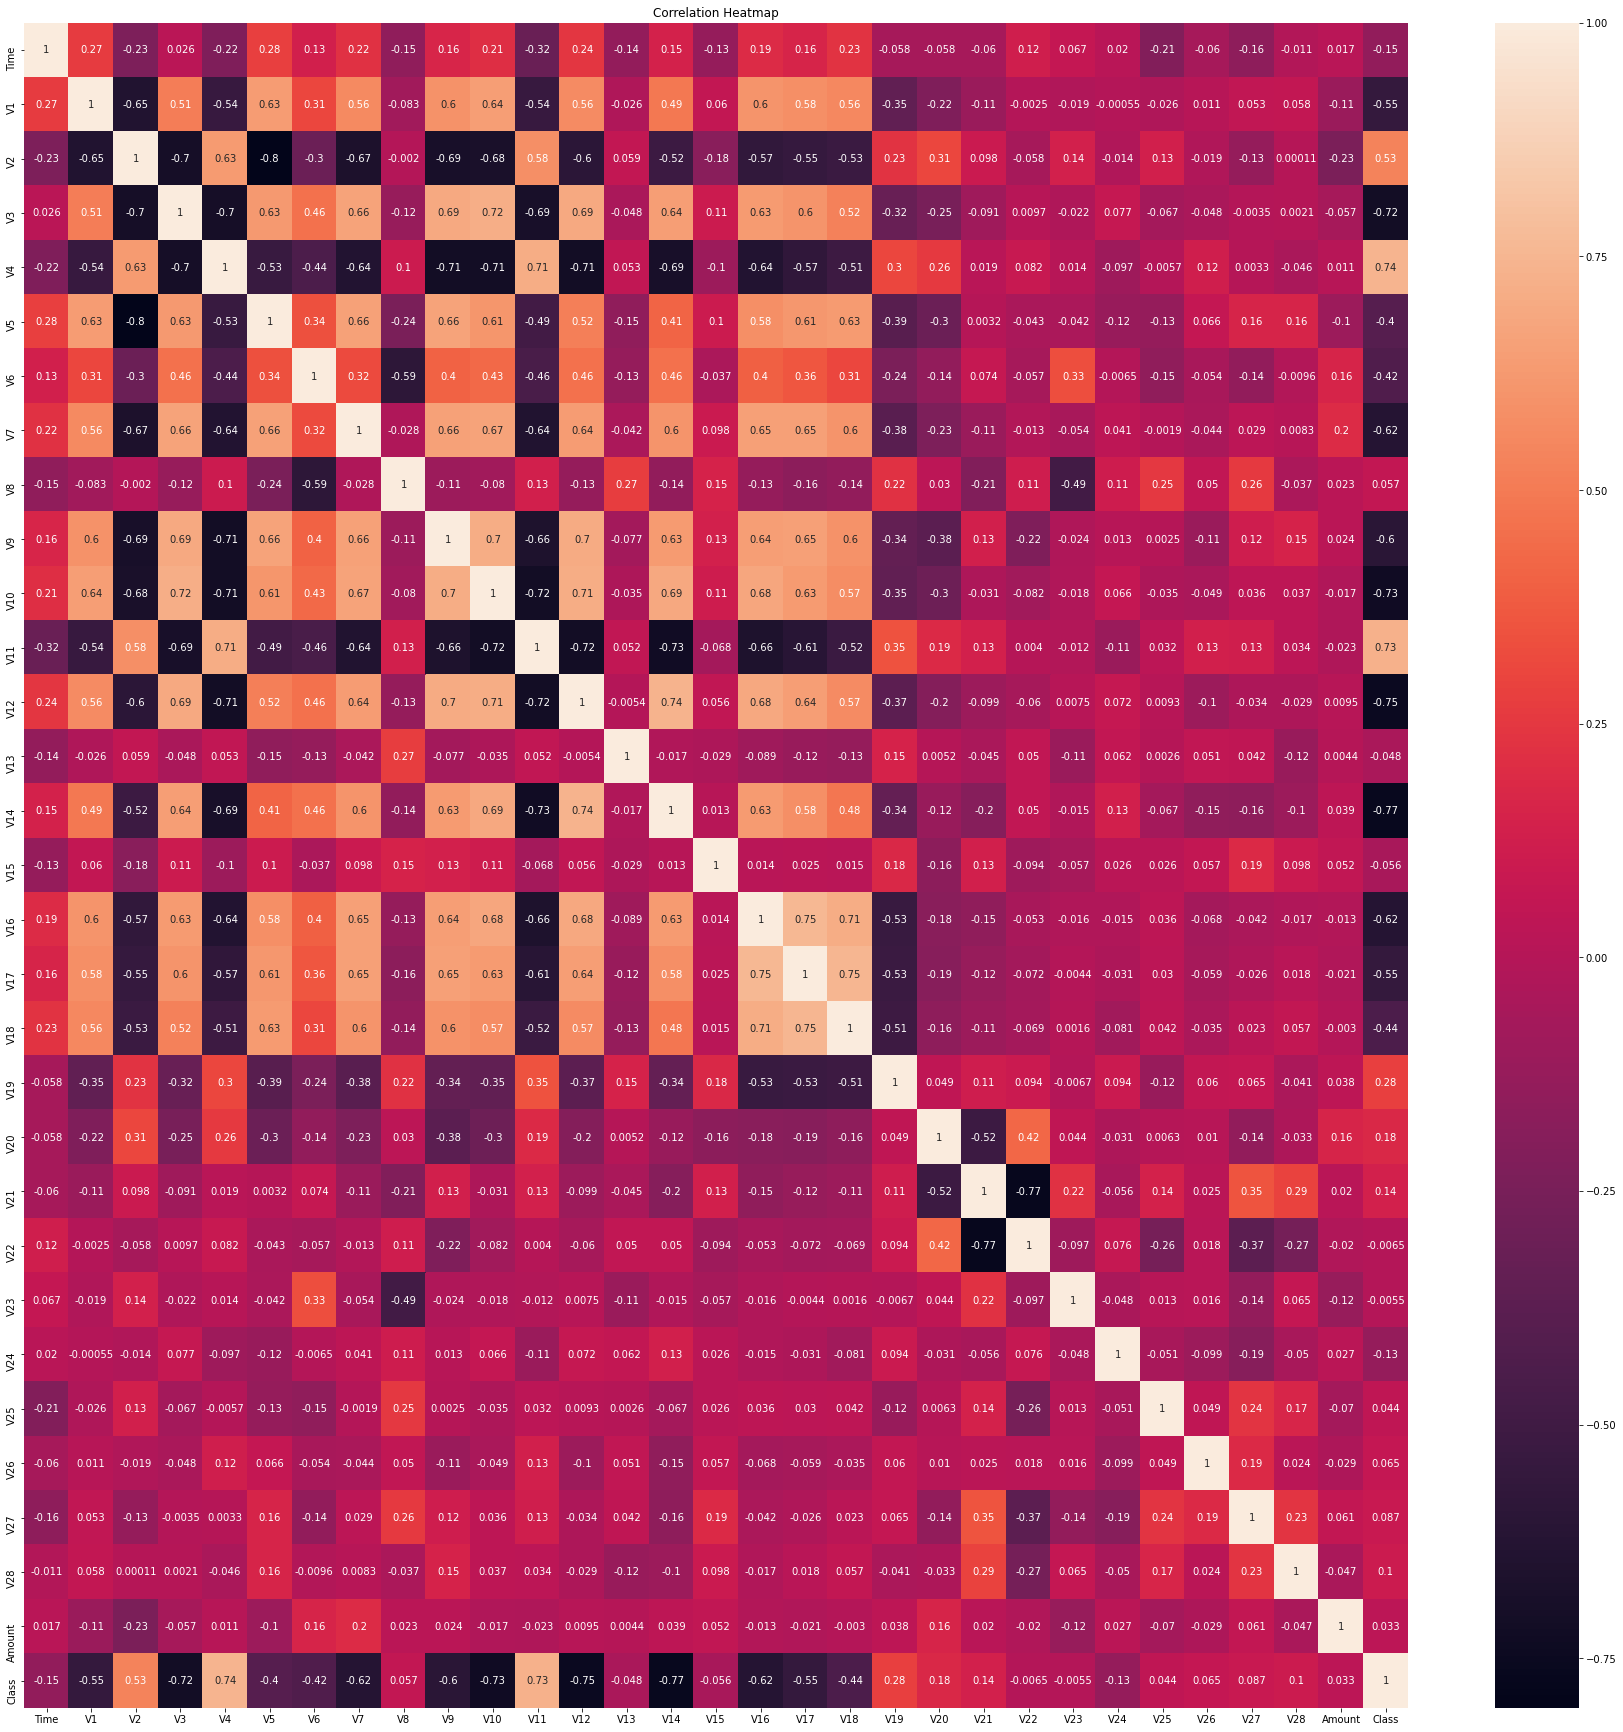

In [15]:
figure = plt.figure(figsize=(31, 31))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Heatmap")
plt.plot()

**From the heatmap above we can see that there is a significant relation between some of the the independent variables so we might have to drop some columns from our dataset. We will keep the threshold at 0.7 and check for correlation between the columns.**

In [16]:
corr = df.corr()
pairs = []
for i in list(corr.columns)[:30]:
    for j in list(corr.columns)[:30]:
        if abs(corr.loc[i,j])>0.7 and corr.loc[i,j] != 1:
            pairs.append([i, j])
            if [i, j] not in pairs or [j, i] not in pairs:
                print(i, ' ',j ,' ', corr.loc[i,j])

V2   V3   -0.701753352517217
V2   V5   -0.803061581673552
V3   V4   -0.7009883682823512
V3   V10   0.7156829529636032
V4   V9   -0.7144038999627806
V4   V10   -0.7122632056673968
V4   V11   0.710627648923654
V4   V12   -0.7123035481280777
V9   V10   0.7048356655730227
V9   V12   0.7041571273476652
V10   V11   -0.7153374722733679
V10   V12   0.7069106963575681
V11   V12   -0.7179235907684128
V11   V14   -0.7255816401765484
V12   V14   0.7354676885391651
V16   V17   0.7547976622700174
V16   V18   0.7093447003865876
V17   V18   0.7466885708294326
V21   V22   -0.771007810810529


From the above results we can observe that:
1. V2 and V5 show strong correlation so we will drop the V5 Column.
2. V12 and V11 are highly correlated with V14 and thus can will have quite similar effect on the target variable so we will drop th column V14.
3. V16 V17 and V18 show a significant correlation so in this case we will drop the V17 column.
4. V21 and V22 also show high correlation so we will drop the V22 column.

In [17]:
df.drop(columns=["V5", "V14", "V17", "V22"], inplace = True)
df.shape

(568630, 27)

### Scatter Plots:
We will plot a scatter plot to check if there are any visible clusters in our data which can indicate if we can apply clustering on our data set.

[]

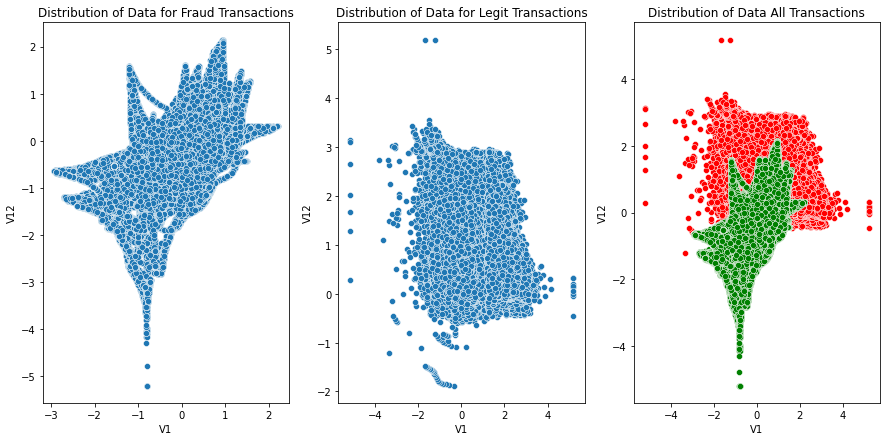

In [18]:
fig = plt.figure(figsize=(15,7))
#print(df[df["Class"]==1].shape)
plt.subplot(1,3,1)
sns.scatterplot(x = df[df["Class"]==1]["V1"], y = df[df["Class"]==1]["V12"])
plt.title("Distribution of Data for Fraud Transactions")
plt.plot()
plt.subplot(1,3,2)
sns.scatterplot(x = df[df["Class"]==0]["V1"], y = df[df["Class"]==0]["V12"])
plt.title("Distribution of Data for Legit Transactions")
plt.plot()
plt.subplot(1,3,3)
sns.scatterplot(x = df[df["Class"]==0]["V1"], y = df[df["Class"]==0]["V12"], color = "red")
sns.scatterplot(x = df[df["Class"]==1]["V1"], y = df[df["Class"]==1]["V12"], color ="green")
plt.title("Distribution of Data All Transactions")
plt.plot()

There are no visible clusters in our data. It is visible that both the transactions fraud and legit are overlapping and don't show any significant distinguishable clusters. 

### Stratified K-Fold Cross Validation:

Now to observe the performance of our models we will use the StrafiedKFold from sklearn.model_selection for this task we will split our data set into 10 folds for trainng and testing data.

The models that we will test are:

1. Random Forest
2. Logistic Regression
3. Naive Bayes
4. Stochastic Gradient Descent Classifier
5. XGBoost Classifier

In [19]:
X = df.iloc[:, :26].values
Y = df.iloc[:, 26].values

def classification_evaluation(classifier, X, Y, classifier_name, columns):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    accuracy_arr = np.zeros(shape=(1,10))
    f1_score_arr = np.zeros(shape=(1,10))
    precision_arr = np.zeros(shape=(1,10))
    recall_arr = np.zeros(shape=(1,10))
    feature_importance_arr = np.zeros(shape=(1,26))
    time_arr = []
    

    cv = StratifiedKFold(n_splits=10)
    fig, ax = plt.subplots(figsize=(15, 10))
    start_time = time.time()
    for i, (train, test) in enumerate(cv.split(X, Y)):
        itr_start_time = time.time()
        classifier.fit(X[train], Y[train])
        itr_end_time = time.time()
        viz = plot_roc_curve(classifier, X[test], Y[test],
                             name=f'ROC fold {i}',
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
        try:
            feature_importance_arr += classifier.feature_importances_
        except:
            try:
                feature_importance_arr += np.array([abs(i) for i in classifier.coef_[0]])
            except:
                feature_importance_arr += np.array([abs(i) for i in permutation_importance(classifier, X[test], Y[test]).importances_mean])
            
        
        predict = classifier.predict(X[test])
        accuracy = classifier.score(X[test], Y[test])
        accuracy_arr[0, i] = accuracy
        f1 = f1_score(predict, Y[test])
        f1_score_arr[0, i] = f1
        precision = precision_score(predict, Y[test])
        precision_arr[0, i] = precision
        recall = recall_score(predict, Y[test])
        recall_arr[0, i] = recall
        train, test = train, test
        time_arr.append(itr_end_time-itr_start_time)
        print(f"Fold-{i}:  accuracy: {accuracy}  f1-score: {f1}  precision: {precision}  recall: {recall}  time: {itr_end_time-itr_start_time}")
    end_time = time.time()
    
    print()
    print(f"Classification Report for {classifier_name}")
    print("Average Accuracy :", np.mean(accuracy_arr))
    print("Average F1-Score :", np.mean(f1_score_arr))
    print("Average Precision :", np.mean(precision_arr))
    print("Average Recall :", np.mean(recall_arr))
    print("Total Time :", end_time - start_time)
    
    fig = plt.figure(figsize=(15, 10))
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title=f"Receiver Operating Characteristic for {classifier_name}")
    ax.legend(loc="lower right")
    plt.show()
    
    feature_importance_arr /= 10
    
    fig = plt.figure(figsize=(15, 10))
    
    plt.subplot(1, 2, 1)
    feature_imp = pd.Series(feature_importance_arr[0], index = columns[:26])
    feature_imp.nlargest(10).plot(kind = 'bar')
    plt.title(f"Feature Importance of {classifier_name}")
    
    
    plt.subplot(1,2,2)
    plt.plot(time_arr, 'go-', color="darkblue")
    plt.plot([max(time_arr) for i in range(10)], color='lightcoral', label='UL')
    plt.plot([min(time_arr) for i in range(10)], color='lightgreen', label='LL')
    plt.title("Training time for every iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Time in sec.")
    plt.legend(loc="upper right")
    
    plt.show()
    
    return np.mean(accuracy_arr), np.mean(f1_score_arr), np.mean(precision_arr), np.mean(recall_arr), mean_auc

Fold-0:  accuracy: 0.9300072103125056  f1-score: 0.9321513808387317  precision: 0.9616263937251591  recall: 0.9044295213205862  time: 19.351929903030396
Fold-1:  accuracy: 0.9746408033343299  f1-score: 0.9742610309867199  precision: 0.9599029228658859  recall: 0.9890551951581923  time: 27.269205331802368
Fold-2:  accuracy: 0.97407804723634  f1-score: 0.9737067427755974  precision: 0.9599732686152439  recall: 0.9878388649607297  time: 30.325850248336792
Fold-3:  accuracy: 0.9736911524189719  f1-score: 0.9733104973952758  precision: 0.9594456754950582  recall: 0.9875819123130951  time: 25.756376266479492
Fold-4:  accuracy: 0.974271494645024  f1-score: 0.973948966327748  precision: 0.9619077767225915  recall: 0.9862954414310444  time: 13.99405312538147
Fold-5:  accuracy: 0.9461336897455287  f1-score: 0.9469435831702205  precision: 0.961381541924592  recall: 0.9329328646028875  time: 23.90722417831421
Fold-6:  accuracy: 0.9716511615637585  f1-score: 0.9712491974031532  precision: 0.9576533

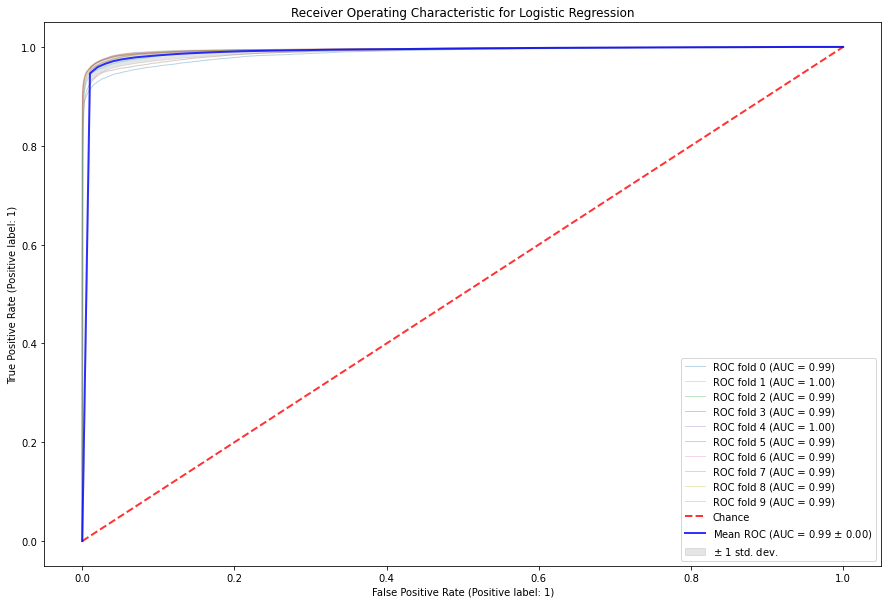

<Figure size 1080x720 with 0 Axes>

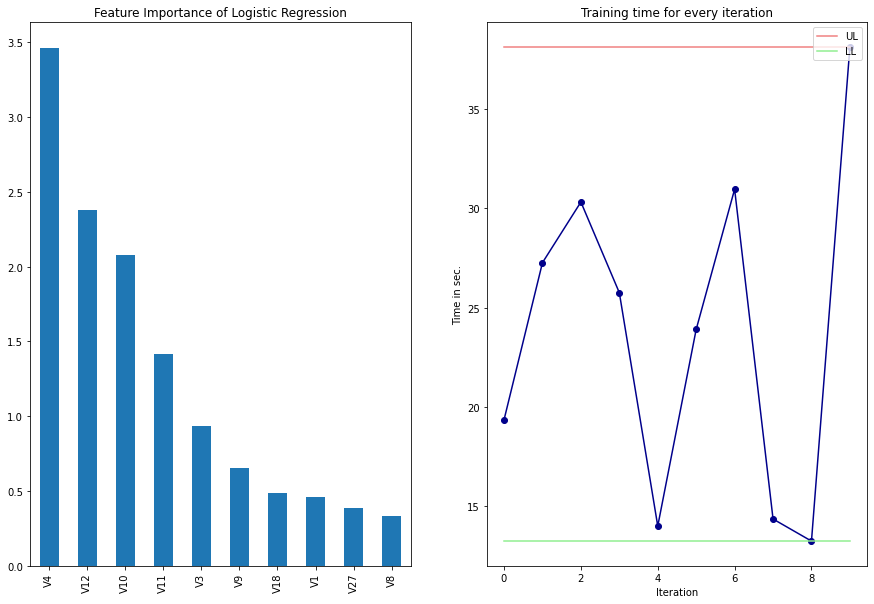

In [20]:
classifier = LogisticRegression(max_iter=1000)
lr_acc, lr_f1, lr_precision, lr_recall, lr_auc = classification_evaluation(classifier, X, Y, "Logistic Regression", list(df.columns))

Fold-0:  accuracy: 0.8977894237025834  f1-score: 0.9018243243243242  precision: 0.9389047166824944  recall: 0.8675615067113004  time: 6.688017845153809
Fold-1:  accuracy: 0.9710884054657686  f1-score: 0.970934549697677  precision: 0.9658119658119658  recall: 0.9761117628239309  time: 6.687535762786865
Fold-2:  accuracy: 0.966551184425725  f1-score: 0.9666690032244497  precision: 0.9701030565228096  recall: 0.963259176474697  time: 4.7419257164001465
Fold-3:  accuracy: 0.9668149763466578  f1-score: 0.9668767224279872  precision: 0.9686961415356478  recall: 0.9650641250262807  time: 5.601079225540161
Fold-4:  accuracy: 0.9666215289379737  f1-score: 0.9665680264919326  precision: 0.9650381625690267  recall: 0.9681027486680075  time: 3.3650829792022705
Fold-5:  accuracy: 0.9130190106044352  f1-score: 0.9170356951154053  precision: 0.9614167135621835  recall: 0.8765713186249359  time: 5.447296857833862
Fold-6:  accuracy: 0.9659004976874241  f1-score: 0.9654976067189808  precision: 0.9542065

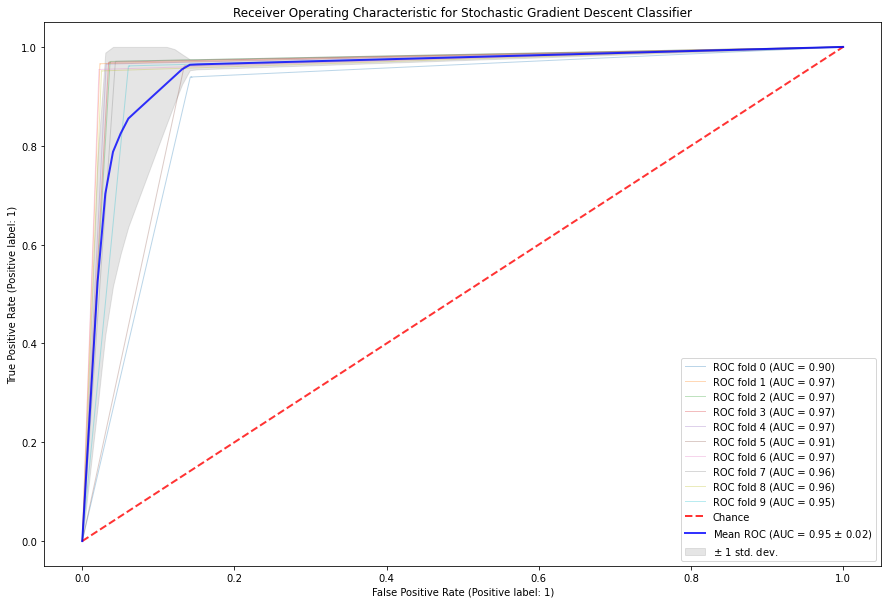

<Figure size 1080x720 with 0 Axes>

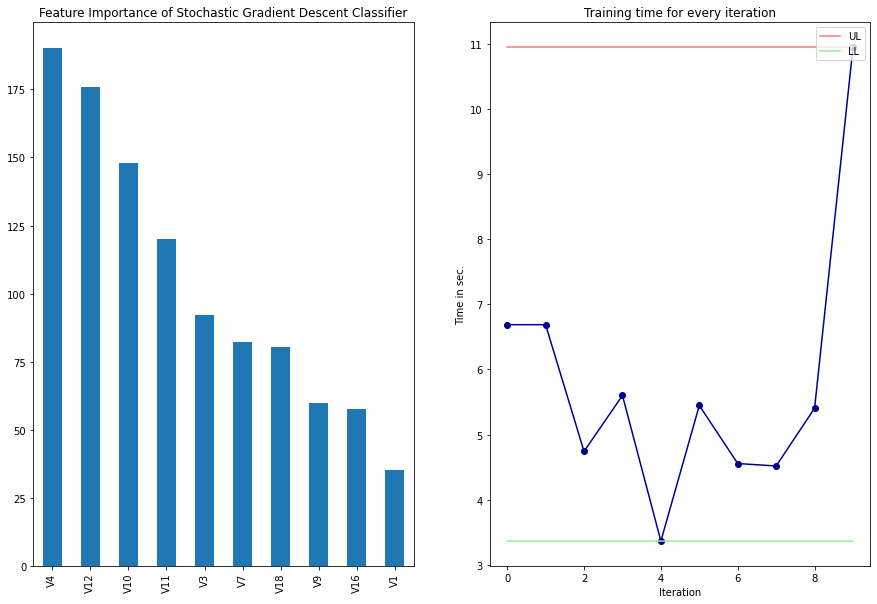

In [21]:
classifier = SGDClassifier(loss="modified_huber", penalty = "l2")
sgd_acc, sgd_f1, sgd_precision, sgd_recall, sgd_auc = classification_evaluation(classifier, X, Y, "Stochastic Gradient Descent Classifier", list(df.columns))

Fold-0:  accuracy: 0.8930939275099802  f1-score: 0.8831747862015951  precision: 0.8082023143751539  recall: 0.97347907134384  time: 0.3018834590911865
Fold-1:  accuracy: 0.8921618627226844  f1-score: 0.8812594399907051  precision: 0.8003587633217263  recall: 0.9803541424324673  time: 0.30985140800476074
Fold-2:  accuracy: 0.890227388635844  f1-score: 0.8795352786784005  precision: 0.8014842953114558  recall: 0.9744280521701946  time: 0.32911205291748047
Fold-3:  accuracy: 0.8927597910767986  f1-score: 0.8820959010054138  precision: 0.8023284443037529  recall: 0.9794752887629353  time: 0.3223838806152344
Fold-4:  accuracy: 0.8936215113518456  f1-score: 0.8830772204503721  precision: 0.8034539762934825  recall: 0.980217988328184  time: 0.32810401916503906
Fold-5:  accuracy: 0.8922322072349331  f1-score: 0.8818083629069589  precision: 0.8040236353404615  recall: 0.9762555517594806  time: 0.32902002334594727
Fold-6:  accuracy: 0.889647046409792  f1-score: 0.8787556757801178  precision: 0.7

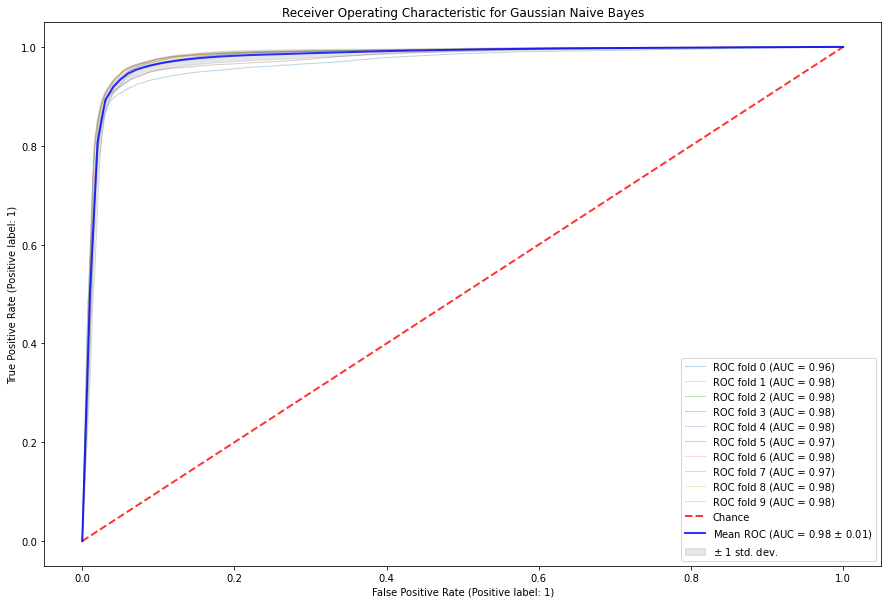

<Figure size 1080x720 with 0 Axes>

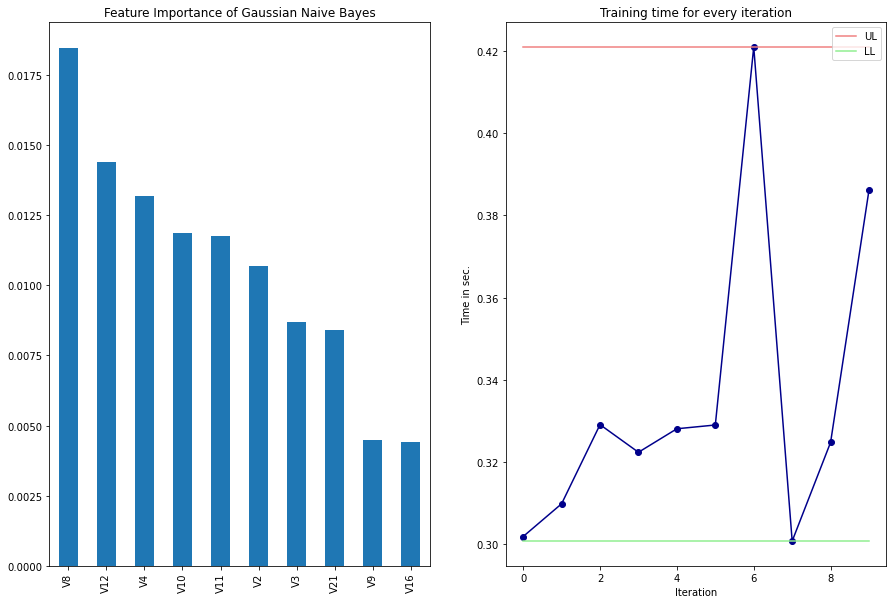

In [22]:
classifier = GaussianNB()
gn_acc, gn_f1, gn_precision, gn_recall, gn_auc = classification_evaluation(classifier, X, Y, "Gaussian Naive Bayes", list(df.columns))

Fold-0:  accuracy: 0.7513673214568348  f1-score: 0.8008620203955152  precision: 0.999929654250642  recall: 0.6678961588159286  time: 77.66155982017517
Fold-1:  accuracy: 0.9998944832316269  f1-score: 0.9998944887982275  precision: 0.999964827125321  recall: 0.9998241603657464  time: 70.39892649650574
Fold-2:  accuracy: 0.9999296554877513  f1-score: 0.9999296591988183  precision: 1.0  recall: 0.9998593282925972  time: 73.71435022354126
Fold-3:  accuracy: 0.9999648277438756  f1-score: 0.9999648283624085  precision: 1.0  recall: 0.9999296591988183  time: 76.48582434654236
Fold-4:  accuracy: 0.9998768971035648  f1-score: 0.9998769100916141  precision: 1.0  recall: 0.9997538504817498  time: 82.5495216846466
Fold-5:  accuracy: 0.9980127675289732  f1-score: 0.998016743598294  precision: 1.0  recall: 0.99604133823787  time: 78.96275043487549
Fold-6:  accuracy: 0.9998944832316269  f1-score: 0.9998944962194479  precision: 1.0  recall: 0.9997890146986427  time: 84.2500467300415
Fold-7:  accuracy:

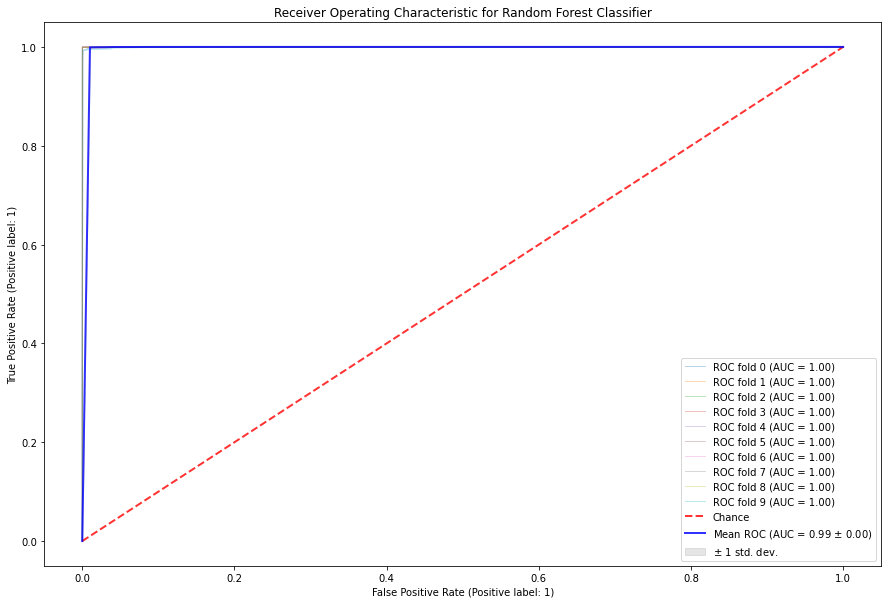

<Figure size 1080x720 with 0 Axes>

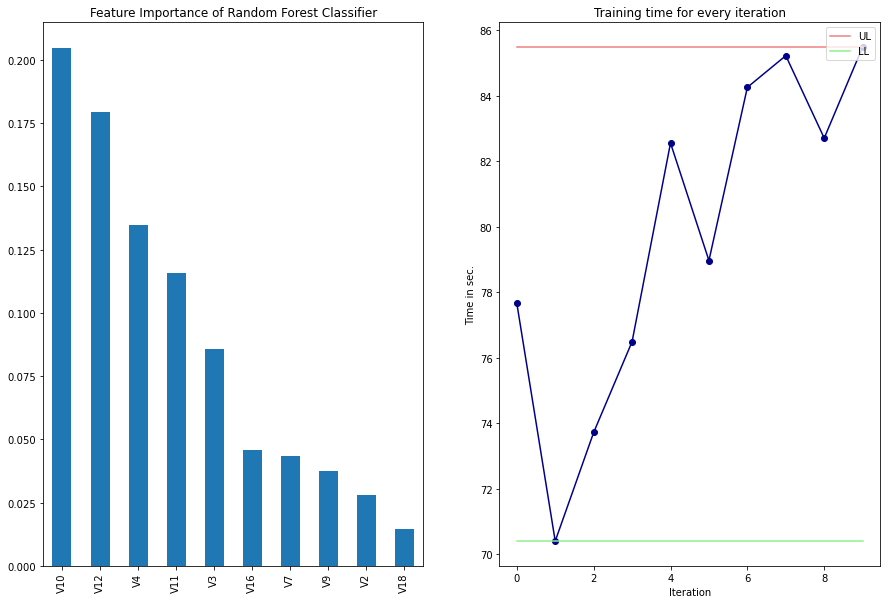

In [23]:
classifier = RandomForestClassifier(n_estimators=20, max_depth = 26)
rf_acc, rf_f1, rf_precision, rf_recall, rf_auc = classification_evaluation(classifier, X, Y, "Random Forest Classifier", list(df.columns))

Fold-0:  accuracy: 0.9268944656454988  f1-score: 0.9318692124887323  precision: 0.999929654250642  recall: 0.8724834274490547  time: 96.70528721809387
Fold-1:  accuracy: 0.9983293178340925  f1-score: 0.9983320750741788  precision: 1.0  recall: 0.9966697048306807  time: 108.19166707992554
Fold-2:  accuracy: 0.994653817069096  f1-score: 0.9946821537277402  precision: 1.0  recall: 0.9894205672524795  time: 115.0209014415741
Fold-3:  accuracy: 0.9987689710356471  f1-score: 0.9987704630085014  precision: 1.0  recall: 0.9975439458264622  time: 125.04199528694153
Fold-4:  accuracy: 0.9995779329265075  f1-score: 0.9995781035755722  precision: 1.0  recall: 0.9991565629942014  time: 120.60020160675049
Fold-5:  accuracy: 0.9751508010481332  f1-score: 0.9757537278857868  precision: 1.0  recall: 0.9526553861618362  time: 125.06688570976257
Fold-6:  accuracy: 0.9995427606703832  f1-score: 0.9995429776762172  precision: 1.0  recall: 0.9990863729004147  time: 113.99297308921814
Fold-7:  accuracy: 0.99

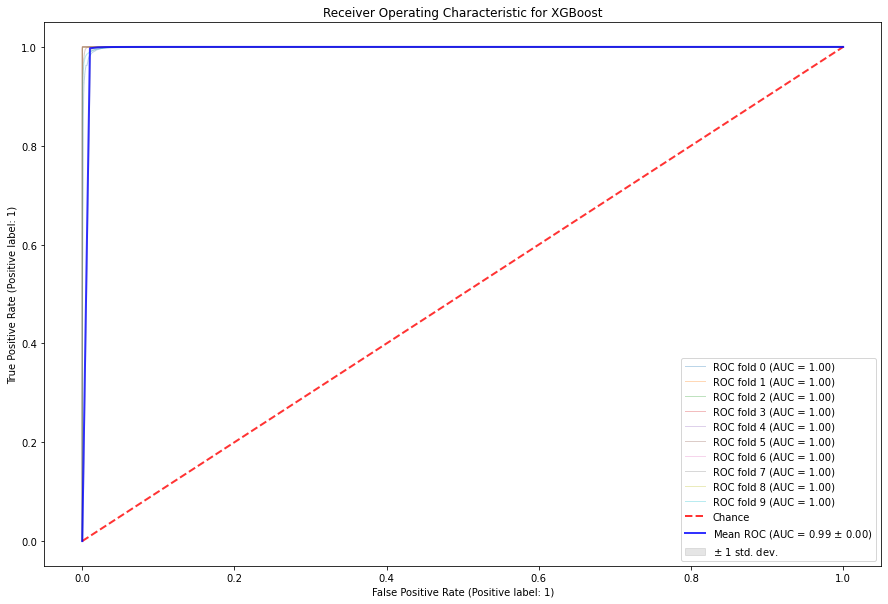

<Figure size 1080x720 with 0 Axes>

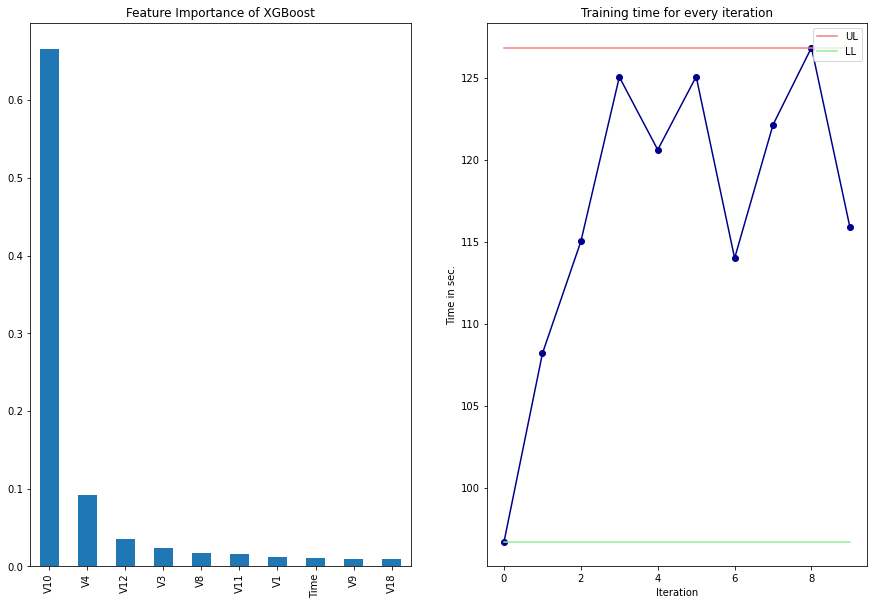

In [24]:
classifier = XGBClassifier(use_label_encoder=False, disable_default_eval_metric=1)
xg_acc, xg_f1, xg_precision, xg_recall, xg_auc = classification_evaluation(classifier, X, Y, "XGBoost", list(df.columns))

### Hybrid Model Creation:

In this hybrid model we will try to use the weighted average of the probabilities of all the models which clear the threshold and compare it with the result of individual predictions. It is believed that a hybrid model is bound to give better or more generalized results as any models having a bias will be neutralized in this process. 

Threshold:
1. Accuracy > 90
2. f1 > 90
3. auc > 90

This hybrid model will be applied for both RandomOverSampling as well as SMOTEK over sampling. This Notebook contains the results for SMOTE Oversampling.

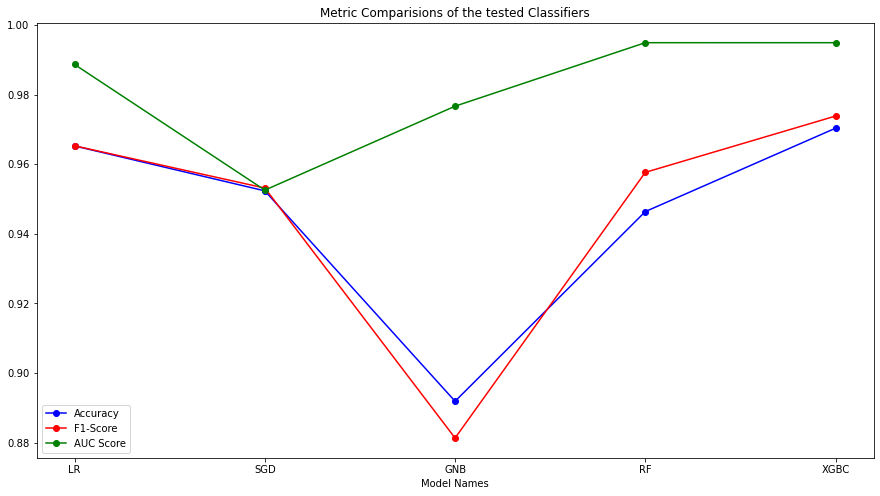

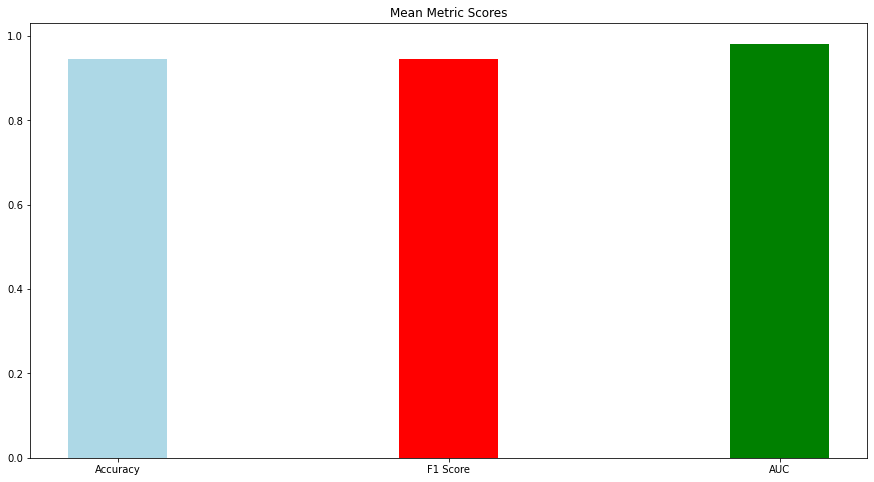

In [25]:
accuracy = [lr_acc, sgd_acc, gn_acc, rf_acc, xg_acc]
f1_scores = [lr_f1, sgd_f1, gn_f1, rf_f1, xg_f1]
auc_scores = [lr_auc, sgd_auc, gn_auc, rf_auc, xg_auc]

mean_acc = sum(accuracy)/5
mean_f1 = sum(f1_scores)/5
mean_auc = sum(auc_scores)/5

fig = plt.figure(figsize=(15,8))
plt.title("Metric Comparisions of the tested Classifiers")
plt.plot(accuracy,'go-', color="blue", label="Accuracy")
plt.plot(f1_scores,'go-', color="red", label="F1-Score")
plt.plot(auc_scores,'go-', color="green", label="AUC Score")
plt.xticks([i for i in range(5)], ["LR", "SGD", "GNB", "RF", "XGBC"])
plt.legend()
plt.xlabel('Model Names')
plt.show()

fig = plt.figure(figsize=(15,8))
plt.title("Mean Metric Scores")
plt.bar(height=[mean_acc, mean_f1, mean_auc], x = ["Accuracy", "F1 Score", "AUC"], width=.3, color=["lightblue", "red", "green"])
plt.show()

In [26]:
def hybrid_model_formation(clf1, clf2, clf3, clf4, clf5, X, Y, columns):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
    
    print("Phase 1 Started")
    print("Training Models and Generating Report:")
    print("------------------------------------------------------------------------------------------------------")
    try:
        t1 = time.time()
        clf1.fit(x_train, y_train)
        clf1_acc = clf1.score(x_test, y_test)
        pred1 = clf1.predict(x_test)
        clf1_f1 = f1_score(pred1, y_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, clf1.predict_proba(x_test)[:, 1])
        clf1_auc = metrics.auc(fpr, tpr)
        feature_imp1 = pd.Series([abs(i) for i in clf1.coef_[0]], index = columns[:26])
        t1_ = time.time()
        final_t1 = t1_ - t1
        print("Model 1 Trained and Tested: ")
        print("Accuracy: ", clf1_acc)
        print("F1 Score:", clf1_f1)
        print("AUC Score: ", clf1_auc)
        print("Time :", final_t1)
        
        print("------------------------------------------------------------------------------------------------------")
        t2 = time.time()
        clf2.fit(x_train, y_train)
        clf2_acc = clf2.score(x_test, y_test)
        pred2 = clf2.predict(x_test)
        clf2_f1 = f1_score(pred2, y_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, clf2.predict_proba(x_test)[:, 1])
        clf2_auc = metrics.auc(fpr, tpr)
        feature_imp2 = pd.Series([abs(i) for i in clf2.coef_[0]], index = columns[:26])
        t2_ = time.time()
        final_t2 = t2_ - t2
        print("Model 2 Trained and Tested: ")
        print("Accuracy: ", clf2_acc)
        print("F1 Score:", clf2_f1)
        print("AUC Score: ", clf2_auc)
        print("Time :", final_t2)
        
        print("------------------------------------------------------------------------------------------------------")
        t3 = time.time()
        clf3.fit(x_train, y_train)
        clf3_acc = clf3.score(x_test, y_test)
        pred3 = clf3.predict(x_test)
        clf3_f1 = f1_score(pred3, y_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, clf3.predict_proba(x_test)[:, 1])
        clf3_auc = metrics.auc(fpr, tpr)
        feature_imp3 = pd.Series([abs(i) for i in permutation_importance(clf3, x_test, y_test).importances_mean], index = columns[:26])
        t3_ = time.time()
        final_t3 = t3_ - t3
        print("Model 3 Trained and Tested: ")
        print("Accuracy: ", clf3_acc)
        print("F1 Score:", clf3_f1)
        print("AUC Score: ", clf3_auc)
        print("Time :", final_t3)
        
        print("------------------------------------------------------------------------------------------------------")
        t4 = time.time()
        clf4.fit(x_train, y_train)
        clf4_acc = clf4.score(x_test, y_test)
        pred4 = clf4.predict(x_test)
        clf4_f1 = f1_score(pred4, y_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, clf4.predict_proba(x_test)[:, 1])
        clf4_auc = metrics.auc(fpr, tpr)
        feature_imp4 = pd.Series(clf4.feature_importances_, index = columns[:26])
        t4_ = time.time()
        final_t4 = t4_ - t4
        print("Model 4 Trained and Tested: ")
        print("Accuracy: ", clf4_acc)
        print("F1 Score:", clf4_f1)
        print("AUC Score: ", clf4_auc)
        print("Time :", final_t4)
        
        print("------------------------------------------------------------------------------------------------------")
        t5 = time.time()
        clf5.fit(x_train, y_train)
        clf5_acc = clf5.score(x_test, y_test)
        pred5 = clf5.predict(x_test)
        clf5_f1 = f1_score(pred5, y_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, clf5.predict_proba(x_test)[:, 1])
        clf5_auc = metrics.auc(fpr, tpr)
        feature_imp5 = pd.Series(clf5.feature_importances_, index = columns[:26])
        t5_ = time.time()
        final_t5 = t5_ - t5
        print("Model 5 Trained and Tested: ")
        print("Accuracy: ", clf5_acc)
        print("F1 Score:", clf5_f1)
        print("AUC Score: ", clf5_auc)
        print("Time :", final_t5)
        print("------------------------------------------------------------------------------------------------------")
        print("Process Successfully completed without any errors....")
    except:
        print("Error Occured during model training and evaluation....")
        return "Error!!"
    
    print()
    print("Phase 2 Started")
    print("The slelection process has started....")
    all_classifiers = [clf1, clf2, clf3, clf4, clf5]
    all_classifiers_names = ["clf1", "clf2", "clf3", "clf4", "clf5"]
    selected_classifiers = [0 for i in range(5)]
    classifiers = {"clf1":clf1, "clf2":clf2, "clf3":clf3, "clf4":clf4, "clf5":clf5}
    accuracys = [clf1_acc, clf2_acc, clf3_acc, clf4_acc, clf5_acc]
    f1_scores = [clf1_f1, clf2_f1, clf3_f1, clf4_f1, clf5_f1]
    auc_scores = [clf1_auc, clf2_auc, clf3_auc, clf4_auc, clf5_auc]
    train_time = [final_t1, final_t2, final_t3, final_t4, final_t5]
    f_imp = [feature_imp1, feature_imp2, feature_imp3, feature_imp4, feature_imp5]
    
    fig = plt.figure(figsize=(15, 10))
    for o in range(5):
        plt.subplot(3,2,o+1)
        f_imp[o].nlargest(10).plot(kind = 'barh')
        plt.title(f"Feature Importance of {all_classifiers_names[o]}")
    
    
    fig = plt.figure(figsize=(15, 8))
    plt.plot([i*100 for i in accuracys], 'go-', color='lightblue', label='Accuracy')
    plt.plot([i*100 for i in f1_scores], 'go-', color='red', label='F1-Score')
    plt.plot([i*100 for i in auc_scores], 'go-', color='green', label='AUC-Score')
    plt.plot(train_time, 'go-', color='darkblue', label='Train Time(sec)')
    plt.title('Model Performance')
    plt.legend()
    plt.xticks([i for i in range(5)], all_classifiers_names)
    plt.xlabel('Model Names')
    plt.show()
    
    for i in range(5):
        if accuracys[i] >= .90 and f1_scores[i] >= .90 and auc_scores[i] >= .90:
            selected_classifiers[i] = 1
            
    for j in range(5):
        if not selected_classifiers[j]:
            all_classifiers[j] = None
            all_classifiers_names[j] = None
            f1_scores[j] = None
            
    all_classifiers = [i for i in all_classifiers if i != None]
    all_classifiers_names = [i for i in all_classifiers_names if i != None]
    f1_scores = [i for i in f1_scores if i != None]
    
    print("The selected classifiers are: ")
    for i in range(len(all_classifiers)):
        print(f"{i+1}. {all_classifiers_names[i]}")
    
    print()
    print("Phase 3 Started")
    # Final testing with formula:
    numerator = []
    denominator = sum([i for i in f1_scores])
    for i in range(len(all_classifiers)):
        proba = all_classifiers[i].predict_proba(x_test)[:, 1]
        # print(proba)
        final_num = np.array([x*f1_scores[i] for x in proba])
        numerator.append(final_num)
        
    numerator_val = np.zeros(shape=y_test.shape)
    for j in range(len(numerator)):
        numerator_val += numerator[j]
        
    numerator_val /= denominator
    
    for i in range(len(numerator_val)):
        if numerator_val[i] > 0.5:
            numerator_val[i] = 1
        else:
            numerator_val[i] = 0
    
    print("The final model is ready and has been evaluated the results are as following:")
    print("Accuracy :", metrics.accuracy_score(numerator_val, y_test))
    print("F1 Score :", f1_score(numerator_val, y_test))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, numerator_val)
    print("AUC Score: ", metrics.auc(fpr, tpr))
    print("Compilation successful!")

Phase 1 Started
Training Models and Generating Report:
------------------------------------------------------------------------------------------------------
Model 1 Trained and Tested: 
Accuracy:  0.9715368517313543
F1 Score: 0.9711710588423894
AUC Score:  0.9941172141322092
Time : 9.218738079071045
------------------------------------------------------------------------------------------------------
Model 2 Trained and Tested: 
Accuracy:  0.9355292545240315
F1 Score: 0.9383368095270135
AUC Score:  0.9360389362047987
Time : 5.87419581413269
------------------------------------------------------------------------------------------------------
Model 3 Trained and Tested: 
Accuracy:  0.8909044545662381
F1 Score: 0.8800247551081585
AUC Score:  0.9781694220146442
Time : 14.663428544998169
------------------------------------------------------------------------------------------------------
Model 4 Trained and Tested: 
Accuracy:  0.9999120693596891
F1 Score: 0.9999119795792624
AUC Score:  0

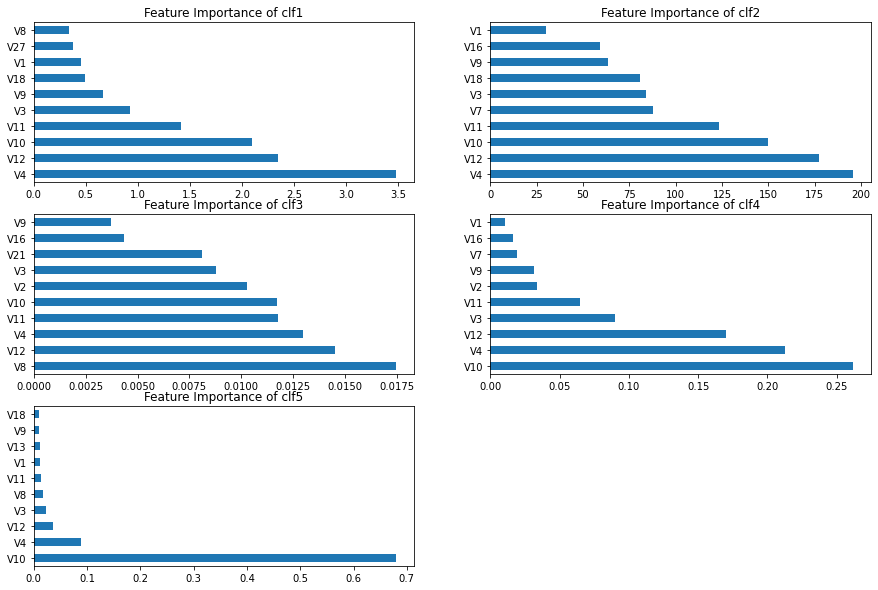

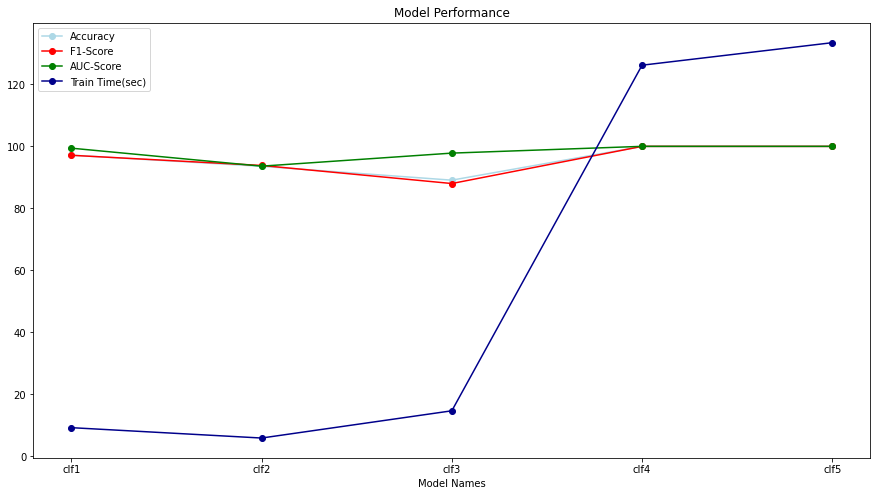

The selected classifiers are: 
1. clf1
2. clf2
3. clf4
4. clf5

Phase 3 Started
The final model is ready and has been evaluated the results are as following:
Accuracy : 0.9978281131843202
F1 Score : 0.9978249958172998
AUC Score:  0.9978277500614833
Compilation successful!


In [27]:
hybrid_model_formation(LogisticRegression(max_iter=1000), SGDClassifier(loss="modified_huber", penalty = "l2"), 
                      GaussianNB(), RandomForestClassifier(n_estimators=20, max_depth = 26), 
                       XGBClassifier(use_label_encoder=False, disable_default_eval_metric=1), X, Y, list(df.columns))